In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns
import sklearn
import gensim
import pyLDAvis
import wordcloud
import textblob
import textstat
import spacy
from nltk.corpus import stopwords
from collections import  Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [136]:
# import data
df= pd.read_csv('teachers_data.csv')
df['Answer'] = df['Answer'].fillna('no respose')

In [137]:
# def stop_words(section):

# stop words
# nltk.download('stopwords')
data = df[df['Question '] == "Do you think technology can help your school development? How, please explain."]
stop=set(stopwords.words('english'))
corpus=[]
data_answers= data['Answer'].str.split()
data_answers=data_answers.values.tolist()
corpus=[word for i in data_answers for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in list(stop):
        dic[word]+=1

# word counter
counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

# sns.barplot(x=y, y=x)


def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['Answer']:
        words=[w for w in word_tokenize(news) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus
corpus=preprocess_news(data)

C:\Users\shami\PycharmProjects\qualitative_analysis\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\shami\PycharmProjects\qualitative_analysis\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\shami\PycharmProjects\qualitative_analysis\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\shami\PycharmProjects\qualitative_analysis\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated an

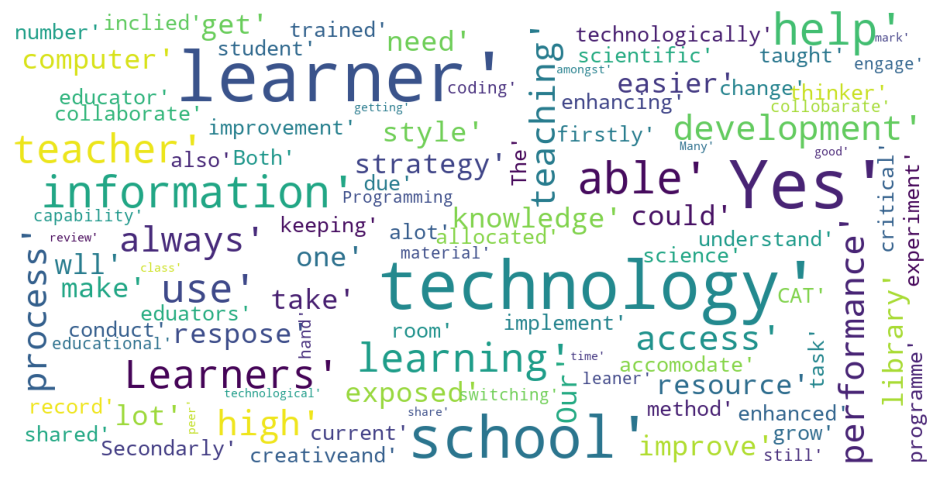

In [138]:
# word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

C:\Users\shami\AppData\Local\Temp\ipykernel_12688\3031252148.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity_score']=data['Answer'].\
C:\Users\shami\AppData\Local\Temp\ipykernel_12688\3031252148.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity']=data['polarity_score'].\


<BarContainer object of 2 artists>

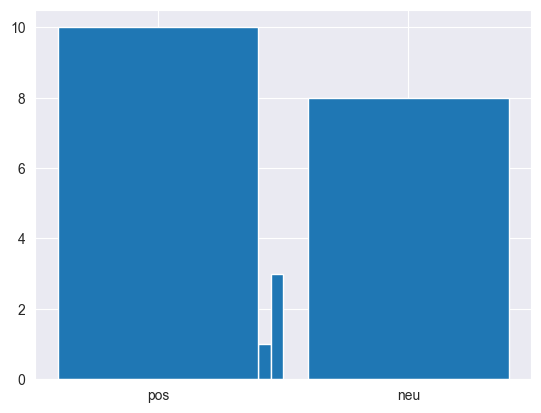

In [139]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

def polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity_score']=data['Answer'].\
   apply(lambda x : polarity(x))
data['polarity_score'].hist()

def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

data['polarity']=data['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(data.polarity.value_counts().index,
        data.polarity.value_counts())

In [140]:
data[data['polarity']=='pos']['Answer']

10     Technology can help the school development bec...
21     Yes, when teachers are trained to be able to u...
32     Yes, there is always a room for improvement. T...
54     Yes, it can due to the high learner number all...
65     Yes, my school is a school of science with mor...
87     Yes, leaners will be able to access educationa...
98     Yes, it can. Our school is still in the proces...
153    Yes, every child is born with an inquisitive m...
186    Yes, it can because technology always provides...
197    Yes, it would. Times have changed, we are in t...
Name: Answer, dtype: object

In [141]:
data[data['polarity']=='neg']['Answer']

Series([], Name: Answer, dtype: object)

In [142]:
data.to_csv('new_data.csv', mode='a', index = False,header=False)